# Probability

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3, venn2_circles

%matplotlib inline

## Basic Definitions
* **trials** - experiments or observations; events where the outcome is unknown
* **sample space** - the set of all possible outcomes of a trial
    * ex. sample space for die is $S = \{1,2,3,4,5,6\}$
    * 1 coin flip: $S = (h,t)$, 2 coin flips: $S = \{(h,h),(h,t),(t,h),(t,t)\}$
* **events** - the specification of the outcome of atrial and can consist of a single outcome or a set of outcomes
    * ex. the event of "heads in flipping one coin" can be specified as $E = \{heads\}$
    * **simple event** - outcome of a single experiment
    * **compound event** - combinations of simple events
* **union** - one or more events occur
    * ex. union of E and F ($E \cup F$) means "either E or F or both occur"
* **intersection** - occurs only if all simple events occur
    * ex. intersection of E and F ($E \cap F$) means "both E and F occur"
* **complement**
* **mutual exclusivity**


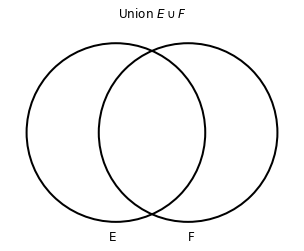

In [43]:
# basic venn diagram
events = {'10': 10, '01': 10, '11': 10}

# union
v = venn2(
    events,
    set_labels=('E','F'),
    set_colors=('white','white')
)

for k in events.keys():
    v.get_label_by_id(k).set_text('')

c = venn2_circles(subsets=(1, 1, 1), linestyle='solid')
plt.title('Union $E \cup F$')
plt.show()

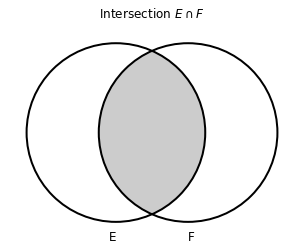

In [49]:
# intersection
v = venn2(
    events,
    set_labels=('E','F'),
    set_colors=('white','white')
)

for k in events.keys():
    v.get_label_by_id(k).set_text('')

c = venn2_circles(subsets=(1, 1, 1), linestyle='solid')
v.get_patch_by_id('11').set_color('grey')
plt.title('Intersection $E \cap F$')
plt.show()